<a href="https://colab.research.google.com/github/robinkm0610/ML_with_Python-R/blob/main/Basics/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('Movie_regression.csv', header= 0)

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [5]:
%load_ext rpy2.ipython

In [6]:
%%R
movie <- read.csv('Movie_regression.csv')

In [7]:
%%R
head(movie)

  Marketing.expense Production.expense Multiplex.coverage   Budget Movie_length
1           20.1264              59.62              0.462 36524.12        138.7
2           20.5462              69.14              0.531 35668.65        152.4
3           20.5458              69.14              0.531 39912.68        134.6
4           20.6474              59.36              0.542 38873.89        119.3
5           21.3810              59.36              0.542 39701.58        127.7
6           20.5970              59.36              0.542 35718.65        132.2
  Lead_.Actor_Rating Lead_Actress_rating Director_rating Producer_rating
1              7.825               8.095           7.910           7.995
2              7.505               7.650           7.440           7.470
3              7.485               7.570           7.495           7.515
4              6.895               7.035           6.920           7.020
5              6.920               7.070           6.815           7.070
6 

In [8]:
%%R
#Data Preprosessing
summary(movie)

 Marketing.expense Production.expense Multiplex.coverage     Budget     
 Min.   :  20.13   Min.   : 55.92     Min.   :0.1290     Min.   :19781  
 1st Qu.:  21.64   1st Qu.: 65.38     1st Qu.:0.3760     1st Qu.:32694  
 Median :  25.13   Median : 74.38     Median :0.4620     Median :34488  
 Mean   :  92.27   Mean   : 77.27     Mean   :0.4453     Mean   :34911  
 3rd Qu.:  93.54   3rd Qu.: 91.20     3rd Qu.:0.5510     3rd Qu.:36794  
 Max.   :1799.52   Max.   :110.48     Max.   :0.6150     Max.   :48773  
                                                                        
  Movie_length   Lead_.Actor_Rating Lead_Actress_rating Director_rating
 Min.   : 76.4   Min.   :3.840      Min.   :4.035       Min.   :3.840  
 1st Qu.:118.5   1st Qu.:7.316      1st Qu.:7.504       1st Qu.:7.296  
 Median :151.0   Median :8.307      Median :8.495       Median :8.312  
 Mean   :142.1   Mean   :8.014      Mean   :8.186       Mean   :8.020  
 3rd Qu.:167.6   3rd Qu.:8.865      3rd Qu.:9.030       

In [9]:
%%R
movie$Time_taken[is.na(movie$Time_taken)] <- mean(movie$Time_taken, na.rm = TRUE)

In [10]:
#python
df['Time_taken'].mean()

157.3914979757085

In [11]:
df['Time_taken'].fillna(value=df['Time_taken'].mean(), inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [13]:
#Dummy variable Creation
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [14]:
# 2 categorical varibles - Genre, 3D_available

df['Genre'].unique()

array(['Thriller', 'Drama', 'Comedy', 'Action'], dtype=object)

In [15]:
df['3D_available'].unique()

array(['YES', 'NO'], dtype=object)

In [16]:
df = pd.get_dummies(df, columns=['Genre', '3D_available'], drop_first=True)

In [17]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,False,False,True,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,False,True,False,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,True,False,False,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,False,True,False,True
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,False,True,False,False


In [18]:
X = df.loc[:, df.columns != 'Collection']
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,False,False,True,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,False,True,False,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,True,False,False,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,False,True,False,True
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,False,True,False,False


In [19]:
X.shape

(506, 19)

In [20]:
y = df['Collection']
y.head()

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Collection, dtype: int64

In [21]:
y.shape

(506,)

In [22]:
# Test-Train split in python
from sklearn.model_selection import train_test_split


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [24]:
X_train.shape

(404, 19)

In [25]:
X_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,False,False,True,False
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,False,False,False,False
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,True,False,False,True
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,False,False,True,True
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,False,False,False,True


In [26]:
X_test.shape

(102, 19)

In [27]:
%%R
install.packages('caTools')

(as ‘lib’ is unspecified)














	‘/tmp/RtmpwzDU7H/downloaded_packages’



In [28]:
%%R
library(caTools)

In [29]:
%%R
set.seed(0)
split = sample.split(movie, SplitRatio = 0.8)
train = subset(movie, split == TRUE)
test = subset(movie, split == FALSE)

In [30]:
#Training Regression Tree
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth=3)
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [31]:
#Predict values using trained model
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [32]:
y_test_pred

array([ 46187.35632184, 100000.        ,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  23514.28571429,  23514.28571429,
        23514.28571429,  23514.28571429,  91860.86956522,  65183.33333333,
        46187.35632184,  65183.33333333,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184, 100000.        ,  46187.35632184,  35137.77777778,
        91860.86956522,  35137.77777778,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        23514.28571429, 100000.        ,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  35137.77777778,  35137.77777778,
        35137.77777778,  46187.35632184,  35137.77777778,  35137.77777778,
        46187.35632184,  

In [33]:
%%R
install.packages('rpart')
install.packages('rpart.plot')


(as ‘lib’ is unspecified)







	‘/tmp/RtmpwzDU7H/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpwzDU7H/downloaded_packages’



In [34]:
%%R
library(rpart)
library(rpart.plot)

In [35]:
%%R
#run regression tree
regtree <- rpart(formula = Collection ~ ., data=train,control= rpart.control(maxdepth = 3) )

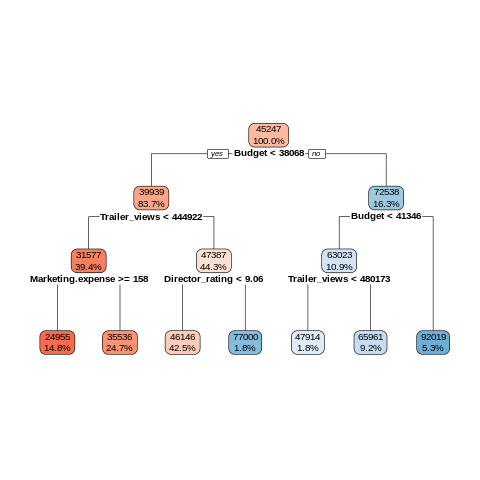

In [36]:
%%R
#plot the decisio tree
rpart.plot(regtree, box.palette="RdBu", digits = -3)

In [37]:
%%R
#predict value at any point
test$pred <- predict(regtree, test, type = 'vector')

In [38]:
%%R
MSE2 <- mean((test$pred - test$Collection) ^2)
MSE2

[1] 113058317


In [39]:
#Model Performance
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
mean_squared_error(y_test, y_test_pred)

162199582.47185558

In [41]:
r2_score(y_test, y_test_pred)

0.4961566592646155

In [42]:
r2_score(y_train, y_train_pred)

0.8364651040556869

In [43]:
pip install Ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.8 MB/s eta 0:00:00


In [44]:
#plotting a decision tree
dot_data = tree.export_graphviz(regtree, out_file=None)
from Ipython.display import Image
import graphviz

ModuleNotFoundError: No module named 'Ipython'

In [ ]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('regtree.png')
Image(graph.create_png())

Controlling Tree growth

In [49]:
!pip install pydotplus graphviz


In [50]:
import pydotplus
from IPython.display import Image

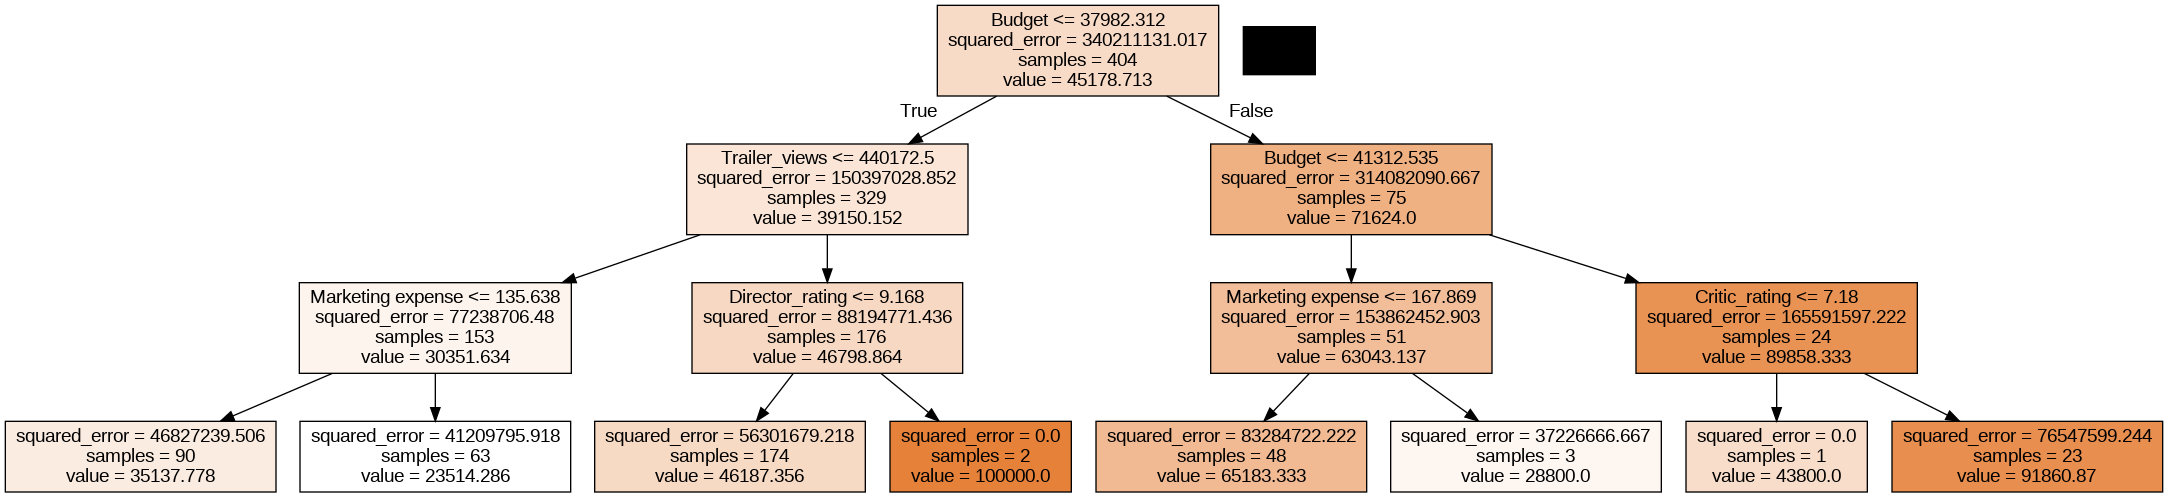

In [53]:
#maximum numbers of levels in tree
regtree = tree.DecisionTreeRegressor(max_depth=3)
regtree.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree, out_file=None, feature_names=X_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

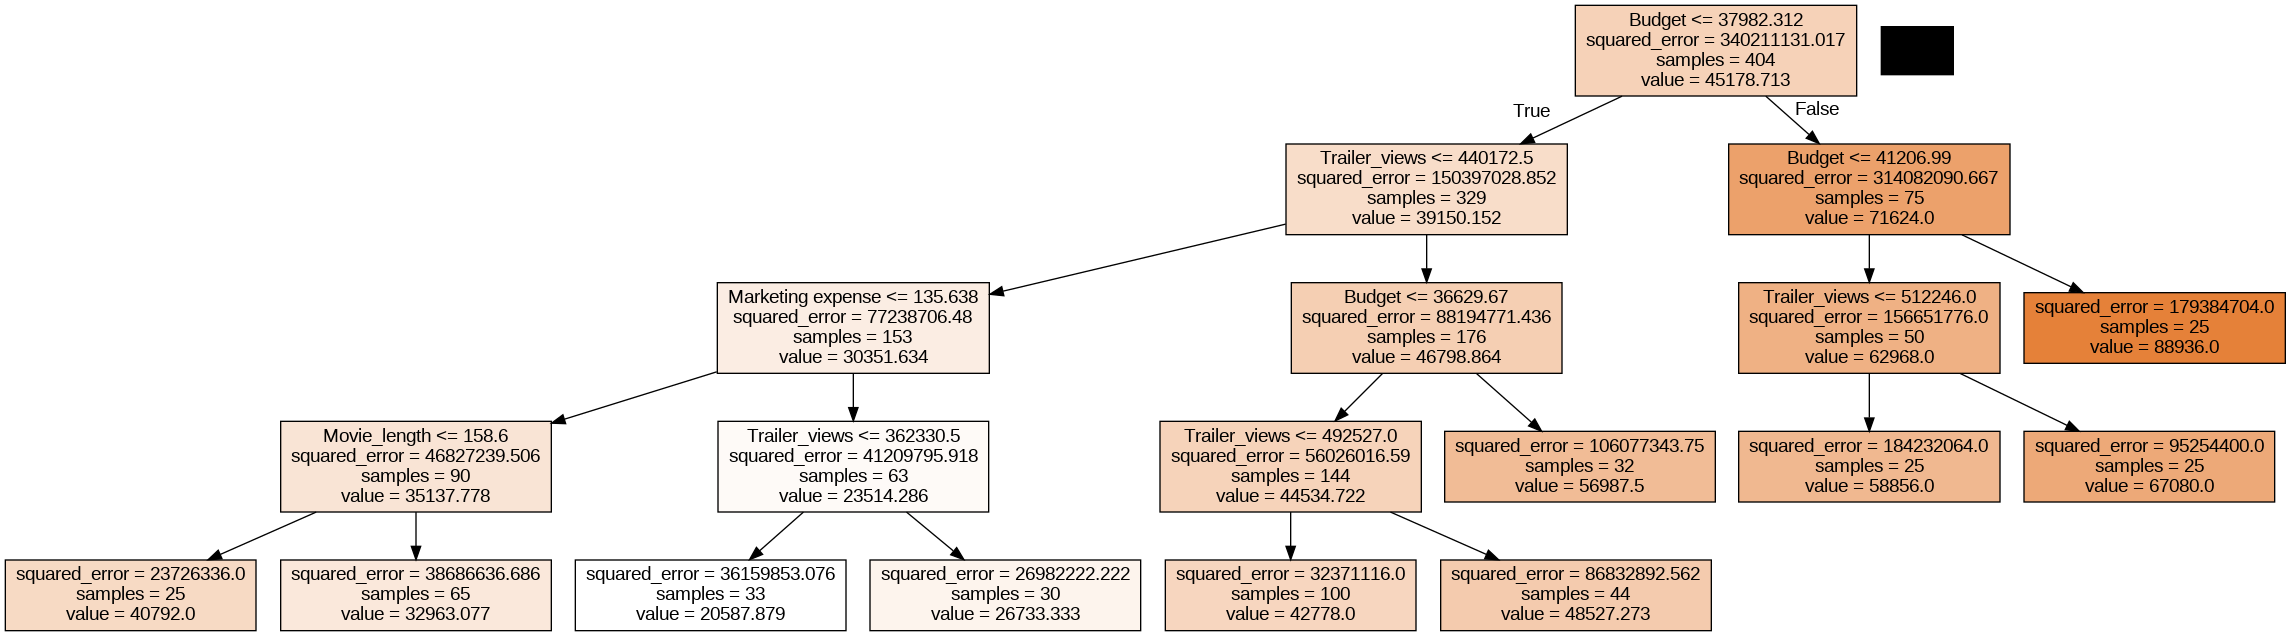

In [57]:
#Minimum observations at leaf node
regtree = tree.DecisionTreeRegressor(min_samples_leaf=25, max_depth = 4)
regtree.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree, out_file=None, feature_names=X_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())


Regression tree:
rpart(formula = Collection ~ ., data = train, control = rpart.control(maxdepth = 3))

Variables actually used in tree construction:
[1] Budget            Director_rating   Marketing.expense Trailer_views    

Root node error: 1.3086e+11/393 = 332989821

n= 393 

        CP nsplit rel error  xerror     xstd
1 0.435077      0   1.00000 1.00423 0.095738
2 0.156588      1   0.56492 0.60747 0.067552
3 0.090647      2   0.40834 0.43671 0.054717
4 0.048872      3   0.31769 0.34195 0.048592
5 0.031052      4   0.26882 0.35956 0.052057
6 0.014585      5   0.23776 0.30678 0.046141
7 0.010000      6   0.22318 0.32016 0.049410


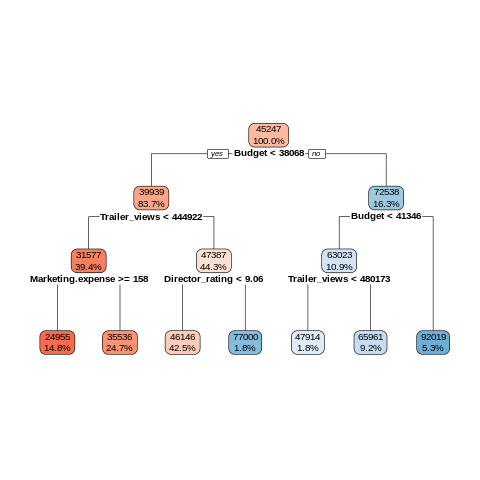

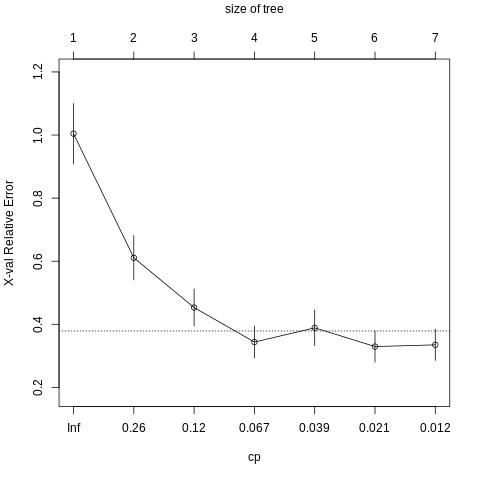

In [59]:
%%R
fulltree <- rpart(formula = Collection ~ ., data=train,control= rpart.control( maxdepth = 3) )
rpart.plot(fulltree, box.palette="RdBu", digits = -3)
printcp(fulltree)
plotcp(regtree)

In [60]:
%%R
mincp <- regtree$cptable[which.min(regtree$cptable[,"xerror"]), "CP"]

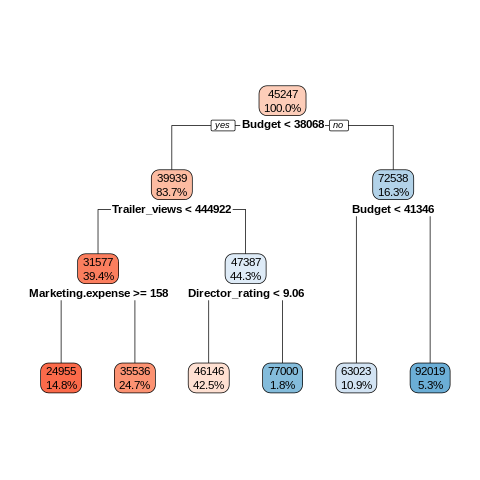

In [62]:
%%R
prunedtree <- prune(fulltree, cp = mincp)
rpart.plot(prunedtree, box.palette="RdBu", digits = -3)

In [63]:
%%R
test$fulltree <- predict(fulltree, test, type = 'vector')
MSE2full <- mean((test$fulltree - test$Collection) ^2)


In [64]:
%%R
test$prunedtree <- predict(prunedtree, test, type = 'vector')
MSE2pruned <- mean((test$prunedtree - test$Collection) ^2)

In [65]:
%%R
accuracy_postprun <- mean(test$fulltree == test$Collection)
accuracy_postprun

[1] 0


In [66]:
df = pd.read_csv('Movie_classification.csv', header= 0)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [68]:
#Missing value impution
df['Time_taken'].fillna(value=df['Time_taken'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [69]:
#dummy variable creation
df = pd.get_dummies(df, columns=['3D_available', 'Genre'], drop_first=True)

In [70]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,True,False,False,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,False,False,True,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,False,True,False,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,True,False,True,False
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,False,False,True,False


In [71]:
#x y split
X = df.loc[:, df.columns != 'Start_Tech_Oscar']
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,True,False,False,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,False,False,True,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,False,True,False,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,True,False,True,False
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,False,False,True,False


In [72]:
y = df['Start_Tech_Oscar']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [75]:
X_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,53400,False,False,False,True
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,43400,False,False,False,False
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,54000,True,True,False,False
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,45800,True,False,False,True
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,20800,True,False,False,False


In [76]:
X_train.shape

(404, 20)

In [78]:
#training classification tree
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth=3)
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [79]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [81]:
confusion_matrix(y_test, y_test_pred)

array([[39,  5],
       [41, 17]])

In [82]:
confusion_matrix(y_train, y_train_pred)

array([[172,  14],
       [126,  92]])

In [83]:
accuracy_score(y_test, y_test_pred)

0.5490196078431373

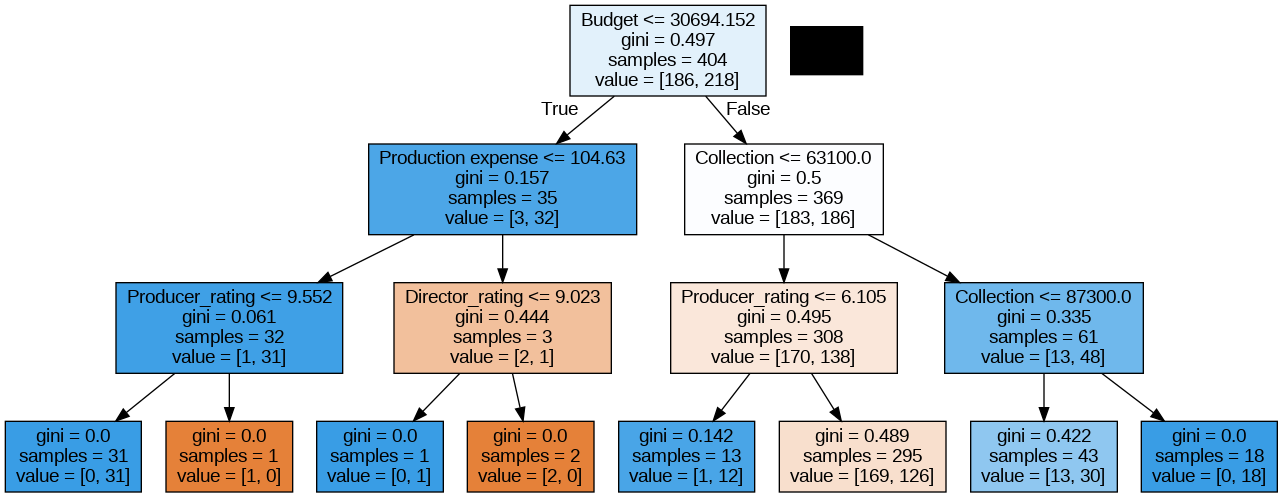

In [84]:
#plotting decision tree

dot_data = tree.export_graphviz(clftree, out_file=None, feature_names=X_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())


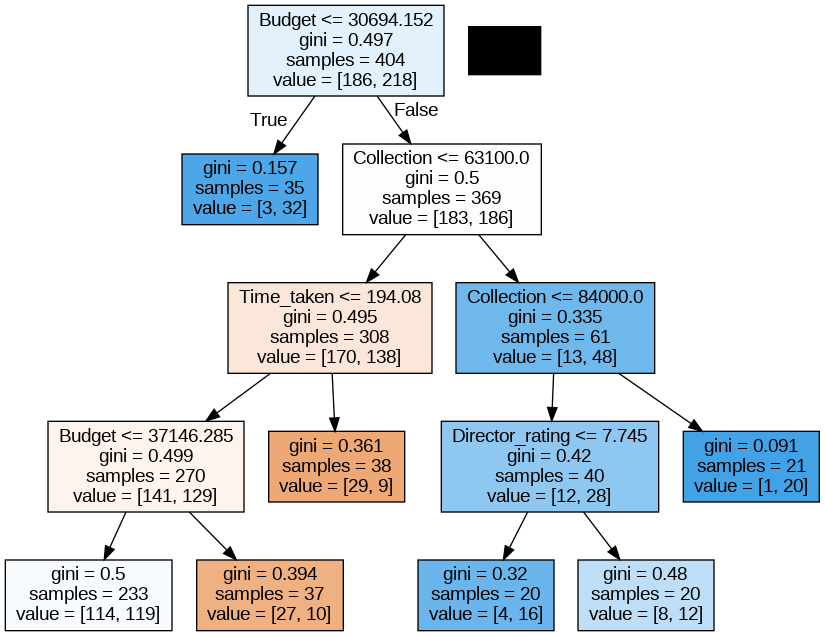

In [85]:
#controlling tree growth
clftree2 = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)
clftree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None, feature_names=X_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

In [86]:
accuracy_score(y_test, clftree2.predict(X_test))

0.5588235294117647